In [6]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.applications import InceptionV3
from keras.models import Model
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


# Load the Dogs vs. Cats dataset
train_dataset, info = tfds.load('cats_vs_dogs', split='train[:80%]', with_info=True)
test_dataset = tfds.load('cats_vs_dogs', split='train[80%:]', with_info=False)


In [7]:
#preprocess the data
def preprocessed_data(features):
    image = features['image']
    label = features['label']
    image = tf.image.resize(image, [128, 128])
    image = tf.cast(image, tf.float32) / 255.0
    return image, label
# train_dataset = train_dataset.map(lambda features: (tf.image.resize(features['image'], (128, 128)) / 255.0, features['label']))
# train_dataset = train_dataset.cache().shuffle(1000).batch(32).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

# # Load the test dataset (without augmentation)
# test_dataset, _ = tfds.load('cats_vs_dogs', split='test', with_info=True)
# test_dataset = test_dataset.map(lambda features: (tf.image.resize(features['image'], (128, 128)) / 255.0, features['label']))
# test_dataset = test_dataset.batch(32).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
train_dataset = train_dataset.map(preprocessed_data).cache().shuffle(1000).batch(16).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.map(preprocessed_data).batch(16).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
# train_labels = tf.cast(train_dataset.map(lambda x, y: y), tf.float32)
# test_labels = tf.cast(test_dataset.map(lambda x, y: y), tf.float32)

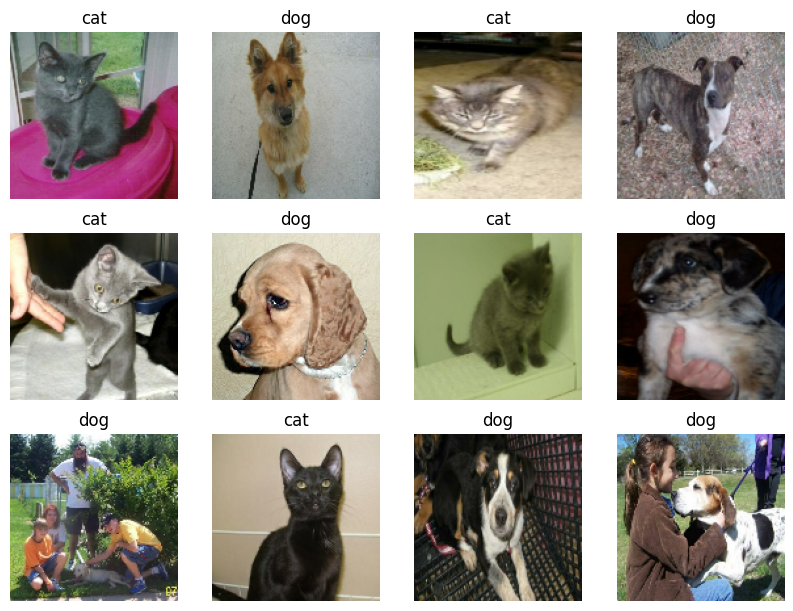

In [9]:
##show some of images with their labels
find_label = ['cat', 'dog']
for image, label in train_dataset.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(12):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(image[i])
        plt.title(find_label[int(label[i])])
        plt.axis("off")
    plt.show()

In [ ]:
# Load the Inception-v3 model
inception_model =InceptionV3(weights='imagenet', include_top=False, input_shape=(128,128, 3))
print(inception_model.summary())


87910968/87910968 [==============================] - 0s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 63, 63, 32)           864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 63, 63, 32)           96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activatio

In [ ]:
from tensorflow.keras import layers, models
#create your model
x = layers.Flatten()(inception_model.output)
ypredict = layers.Dense(1 , activation='sigmoid')(x)

model = Model(inputs=inception_model.input , outputs=ypredict)
#dont forget to freeze the pretrained part
for layer in inception_model.layers:
  layer.trainable = False

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 63, 63, 32)           864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 63, 63, 32)           96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 63, 63, 32)           0         ['batch_normalization[0][0

In [ ]:
#train your model
history = model.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10
1164/1164 [==============================] - 38s 33ms/step - loss: 0.2678 - accuracy: 0.9505 - val_loss: 0.4788 - val_accuracy: 0.9325
Epoch 2/10
1164/1164 [==============================] - 33s 29ms/step - loss: 0.2791 - accuracy: 0.9519 - val_loss: 1.2258 - val_accuracy: 0.8856
Epoch 3/10
1164/1164 [==============================] - 34s 30ms/step - loss: 0.2539 - accuracy: 0.9577 - val_loss: 1.0364 - val_accuracy: 0.9000
Epoch 4/10
1164/1164 [==============================] - 34s 29ms/step - loss: 0.2183 - accuracy: 0.9608 - val_loss: 0.8815 - val_accuracy: 0.9160
Epoch 5/10
1164/1164 [==============================] - 30s 26ms/step - loss: 0.2188 - accuracy: 0.9598 - val_loss: 0.7351 - val_accuracy: 0.9256
Epoch 6/10
1164/1164 [==============================] - 30s 26ms/step - loss: 0.2138 - accuracy: 0.9620 - val_loss: 0.7446 - val_accuracy: 0.9222
Epoch 7/10
1164/1164 [==============================] - 31s 26ms/step - loss: 0.2072 - accuracy: 0.9623 - val_loss: 1.1935 -

In [ ]:
#report the accuracy on your test set
Accuracy = model.evaluate(test_dataset)[1]
print(f'Test Accuracy: {Accuracy}')

291/291 [==============================] - 8s 28ms/step - loss: 0.6409 - accuracy: 0.9355
Test Accuracy: 0.935511589050293
